# Fooboar's Geburtstagsparty!

Es ist soweit! **Fooboar's 13. Geburtstag** steht an und es müssen noch einige Vorbereitungen getroffen werden. Fooboar will eine große Geburtstagsfeier veranstalten und kann sich nicht um alles alleine kümmern.
**Löst die folgenden Aufgaben und helft Fooboar einen tollen Geburtstag zu verbringen!!**

## AUFGABE 1 - Den Ort der Party bestimmen

Fooboar sucht als Erstes mit seinen Freunden einen Ort, an dem der Geburtstag gefeiert werden kann. Finde anhand des Chatverlaufs heraus, wo der Geburtstag stattfinden soll.

Fooboar hat sich bereits mit seinen Freunden über den Ort ausgetauscht und der unten stehende Chatverlauf soll mittels *Text Mining* analysiert werden. Mit Text Mining könnt ihr aus großen oder unstrukturierten Texten systematisch Informationen extrahieren - wie z. B. den Ort von Fooboar's Party. 

Hierzu braucht ihr "spaCy". SpaCy ist eine Bibliothek in Python, die euch bei der Aufgabe unterstützt. Sie nutzt Natural Language Processing, um Wörter, Sätze, Orte oder Personen maschinell zu erkennen. Also genau das was wir brauchen!

Exkurs: *Natural Language Processing*
Natural Language Processing ist ein Teilgebiet der Künstlichen Intelligenz und beschäftigt sich damit, menschliche Sprache zu verstehen, verarbeiten und erzeugen zu können.

**Aufgabe 1.1 Download von SpaCy**
Nutze das Terminal und gib folgenden Befehl ein: _pip install spacy_ <br>
Die Installation kann wenige Minuten dauern.

In das selbe Terminal Fenster: _python -m spacy download de_core_news_sm_ <br>
Mit dem Befehl versteht spaCy deutsche Texte. Jetzt kann es also losgehen!

**Aufgabe 1.2 Code vervollständigen**

Von dem fertigen Code sind einige Zeilen verloren gegangen. Vervollständige sie und finde den finalen Ort der Party anhand des Codes heraus!

### Fooboar's Chatverlauf: 

*Fooboar*: „Hallo meine Freunde! Ich würde gerne meinen Geburtstag mit euch zusammen verbringen und suche noch einen passenden Ort, an dem wir zusammen feiern können! Habt ihr Ideen, wo wir uns treffen können?“ <br>
*Alan*: „Hi Fooboar! Ich würde das Bambados Schwimmbad vorschlagen! Da verbringe ich gerne meine Zeit draußen in der Sonne und es macht in einer großen Gruppe sicherlich Spaß dort.“<br>
*Ada*: „@Alan Ich habe gerade im Radio gehört, dass es an Fooboars Geburtstag regnen soll. Da können wir also nicht hingehen. Was sagt ihr dazu, wenn wir etwas töpfern würden?“<br>
*Marvin*: „Töpfern macht mir keinen Spaß! Das ist viel zu langweilig – ich brauche etwas abenteuerliches. In der Nachbarstadt gibt es einen großartigen Klettergarten, da soll es auch nicht regnen.“<br>
*Barbara*: „Eigentlich eine gute Idee, aber ich habe Höhenangst! Da will ich auf garkeinen Fall hoch und mein Leben riskieren!! Was sagt ihr zu einer Pferdekoppel? Da können wir reiten gehen und im Heu spielen wir früher als kleine Kinder.“<br>
*Tim*: „Nee da muss ich absagen, ich bin gegen Heu allergisch und finde die Idee nicht gut. Können wir daheim etwas gemeinsam kochen? Ich liebe Pizza.“<br>
*Linus*: „Das gefällt mir nicht, nur daheim hocken können wir auch sonst immer machen. Ich möchte etwas Besonderes machen.“<br>
*Grace*: „Da stimme ich zu, die Idee ist nicht gut. Wir können doch Bungee Jumping machen!“<br>
*John*: „Niemals! Das ist mir zu extrem. Gegen einen Tag bei dem Tierheim Bamberg e.V habe ich aber nichts dagegen. Da können wir uns auch raus und mit den Hunden spazieren gehen! Und wir tun noch etwas Gutes dabei“<br>
*Grace*: "Das Tierheim Bamberg e.V finde ich ja ganz toll! Da wollte ich immer schon mal besuchen."
*Marvin*: "Ich liebe Tiere genauso gerne wie klettern zu gehen. Meinetwegen gerne das Tierheim Bamberg e.V."
*Fooboar*: „Die Idee gefällt mir gut. Das machen wir. Wir gehen in das Tierheim Bamberg e.V.“<br>

In [7]:
import spacy
from collections import Counter
import re

# hier laden wir das deutsches Modell
nlp = spacy.load("de_core_news_sm")

# Aufgabe 1: füge hier den Inhalt des Chats ein. Tipp: hier brauchen wir ein mehrzeiligen String, da der Chatverlauf lang ist!

# Lösung für Aufgabe 1
chat = """
Fooboar: „Hallo meine Freunde! Ich würde gerne meinen Geburtstag mit euch zusammen verbringen und suche noch einen passenden Ort, an dem wir zusammen feiern können! Habt ihr Ideen, wo wir uns treffen können?“
Alan: „Hi Fooboar! Ich würde das Bambados Schwimmbad vorschlagen! Da verbringe ich gerne meine Zeit draußen in der Sonne und es macht in einer großen Gruppe sicherlich Spaß dort.“
Ada: „@Alan Ich habe gerade im Radio gehört, dass es an Fooboars Geburtstag regnen soll. Da können wir also nicht hingehen. Was sagt ihr dazu, wenn wir etwas töpfern würden?“
Marvin: „Töpfern macht mir keinen Spaß! Das ist viel zu langweilig – ich brauche etwas abenteuerliches. In der Nachbarstadt gibt es einen großartigen Klettergarten, da soll es auch nicht regnen.“
Barbara: „Eigentlich eine gute Idee, aber ich habe Höhenangst! Da will ich auf garkeinen Fall hoch und mein Leben riskieren!! Was sagt ihr zu einer Pferdekoppel? Da können wir reiten gehen und im Heu spielen wir früher als kleine Kinder.“
Tim: „Nee da muss ich absagen, ich bin gegen Heu allergisch und finde die Idee nicht gut. Können wir daheim etwas gemeinsam kochen? Ich liebe Pizza.“
Linus: „Das gefällt mir nicht, nur daheim hocken können wir auch sonst immer machen. Ich möchte etwas Besonderes machen.“
Grace: „Da stimme ich zu, die Idee ist nicht gut. Wir können doch Bungee Jumping machen!“
John: „Niemals! Das ist mir zu extrem. Gegen einen Tag bei dem Tierheim Bamberg e.V habe ich aber nichts dagegen. Da können wir uns auch raus und mit den Hunden spazieren gehen! Und wir tun noch etwas Gutes dabei“
Grace: "Das Tierheim Bamberg e.V finde ich ja ganz toll! Da wollte ich immer schon mal besuchen." 
Marvin: "Ich liebe Tiere genauso gerne wie klettern zu gehen. Meinetwegen gerne das Tierheim Bamberg e.V." 
Fooboar: „Die Idee gefällt mir gut. Das machen wir. Wir gehen in das Tierheim Bamberg e.V.“
"""

# Nutzen wir jetzt spacy, um unseren Chatverlauf zu analysieren: Das machen wir mit dem oben erklärten Natural Language Processing (nlp)
doc = nlp(chat)

# Als nächstes wollen wir eine Liste erstellen, die die von spacy als Ort oder Organisation erkannten Begriffe enthält.
# Folgende Bausteine brauchst du um die nächste Aufgabe zu lösen:
# doc.ents = Nachdem die Zeile doc = nlp(chat) ausgeführt wurde, erkennt unser Code alle Entitäten mit "doc.ents". 
# ent.text = ?? Was zeigt ent.text dann an ??
# .strip() = Satzzeichen werden entfernt. Der Schritt ist notwendig, um aus "Baumhaus" und Baumhaus?!" den selben Ort zu interpretieren.
# ent.label_ in ["LOC", "ORG", "GPE"]] --> hier werden nur die Entitäten rausgefiltert, die auch zu unserer Suche passen, Orte (LOC), Organisationen (ORG) und Städte/Länder etc. (GPE)

# Aufgabe 2: Baue aus diesen Code-Einzelteilen eine Zeile, in der die Liste erstellt wird! Fülle dazu die 5 "..."-Lücken im Code!
#orte = [ent.text....("!.?") for ent in ... if ..._ in ["...", "...", "GPE"]]


# Lösung für Aufgabe 2:
orte = [ent.text.strip("!.?") for ent in doc.ents if ent.label_ in ["LOC", "ORG", "GPE"]]


keywords = ["Schwimmbad", "töpfern", "Klettergarten", "Pferdekoppel", "Bungee Jumping", "Tierheim", "daheim"]

# Aufgabe 3: Ergänze die Schleife, damit alle Treffer zu "orte" hinzugefügt werden. 
# 1: Hier wird gezählt wie oft das Wort vorkommt
# 2: das gefundene Wort wird zur Liste "orte" hinzugefügt
# 3: Welches Wort kommt wie oft vor?

#for word in keywords:
    #anzahl = chat.lower().count(....lower()) # 1
    #if anzahl > 0:
        #....append(...) # 2
        #print(..., "kommt", ..., "mal vor") # 3


# Lösung für Aufgabe 3
for word in keywords:
    anzahl = chat.lower().count(word.lower())
    if anzahl > 0:
        orte.append(word)
        print(word, "kommt", anzahl, "mal vor")


counter = Counter(orte)

# Jetzt schauen wir uns die Ergebnisse mal an!
print("Gefundene Orte / Aktivitäten und Häufigkeiten:\n")
for ort, anzahl in counter.most_common():
    print(f"{ort}: {anzahl}x")

# und bestimmen die Häufigkeit
if counter:
    top = counter.most_common(1)[0][0]
    print(f"Der wahrscheinlichste Party-Ort ist: {top}")
else: 
    print("Es wurden keine Orte erkannt.")


Schwimmbad kommt 1 mal vor
töpfern kommt 2 mal vor
Klettergarten kommt 1 mal vor
Pferdekoppel kommt 1 mal vor
Bungee Jumping kommt 1 mal vor
Tierheim kommt 4 mal vor
daheim kommt 2 mal vor
Gefundene Orte / Aktivitäten und Häufigkeiten:

Tierheim Bamberg e.V: 2x
Nachbarstadt: 1x
Niemals: 1x
Tierheim Bamberg: 1x
Schwimmbad: 1x
töpfern: 1x
Klettergarten: 1x
Pferdekoppel: 1x
Bungee Jumping: 1x
Tierheim: 1x
daheim: 1x
Der wahrscheinlichste Party-Ort ist: Tierheim Bamberg e.V


## AUFGABE 2 - Gästeliste als Netzwerk darstellen

Jetzt da wir endlich wissen, wo die Feier stattfindet, können wir uns den Gästen widmen. **Wen kennt Fooboar alles** und in welcher Beziehung stehen sie zu Fooboar? Erstelle aus dem Fließtext einen Netzwerkgraphen. In der Mitte soll Fooboar stehen, auf den Kanten des Graphen die Bezeichnungen der Bekannten (z.B. Schwester, Schulfreund/in, Sport-kumpel).

### Exkurs: Netzwerkgraph
Ein **Netzwerkgraph** stellt Entitäten und die Beziehungen von Entitäten zueinander dar. Das Bild ist eine vereinfachte Version eines Netzwerkgraphen, in unserem Beispiel sollen noch die Namen von Fooboars Bekannten hinzugefügt werden. <br>
Bei einem Netzwerkgraphen werden **Knoten** die Entitäten genannt, das können z.B. Objekte, Personen oder Orte sein. **Kanten** werden die Verbindungen zwischen den Entitäten bezeichnet, das könnten Bezeichnungen wie "ist Freundin von" oder "ist Schwester von" sein.

#### Beispiel eines Netzwerkgraphen: 
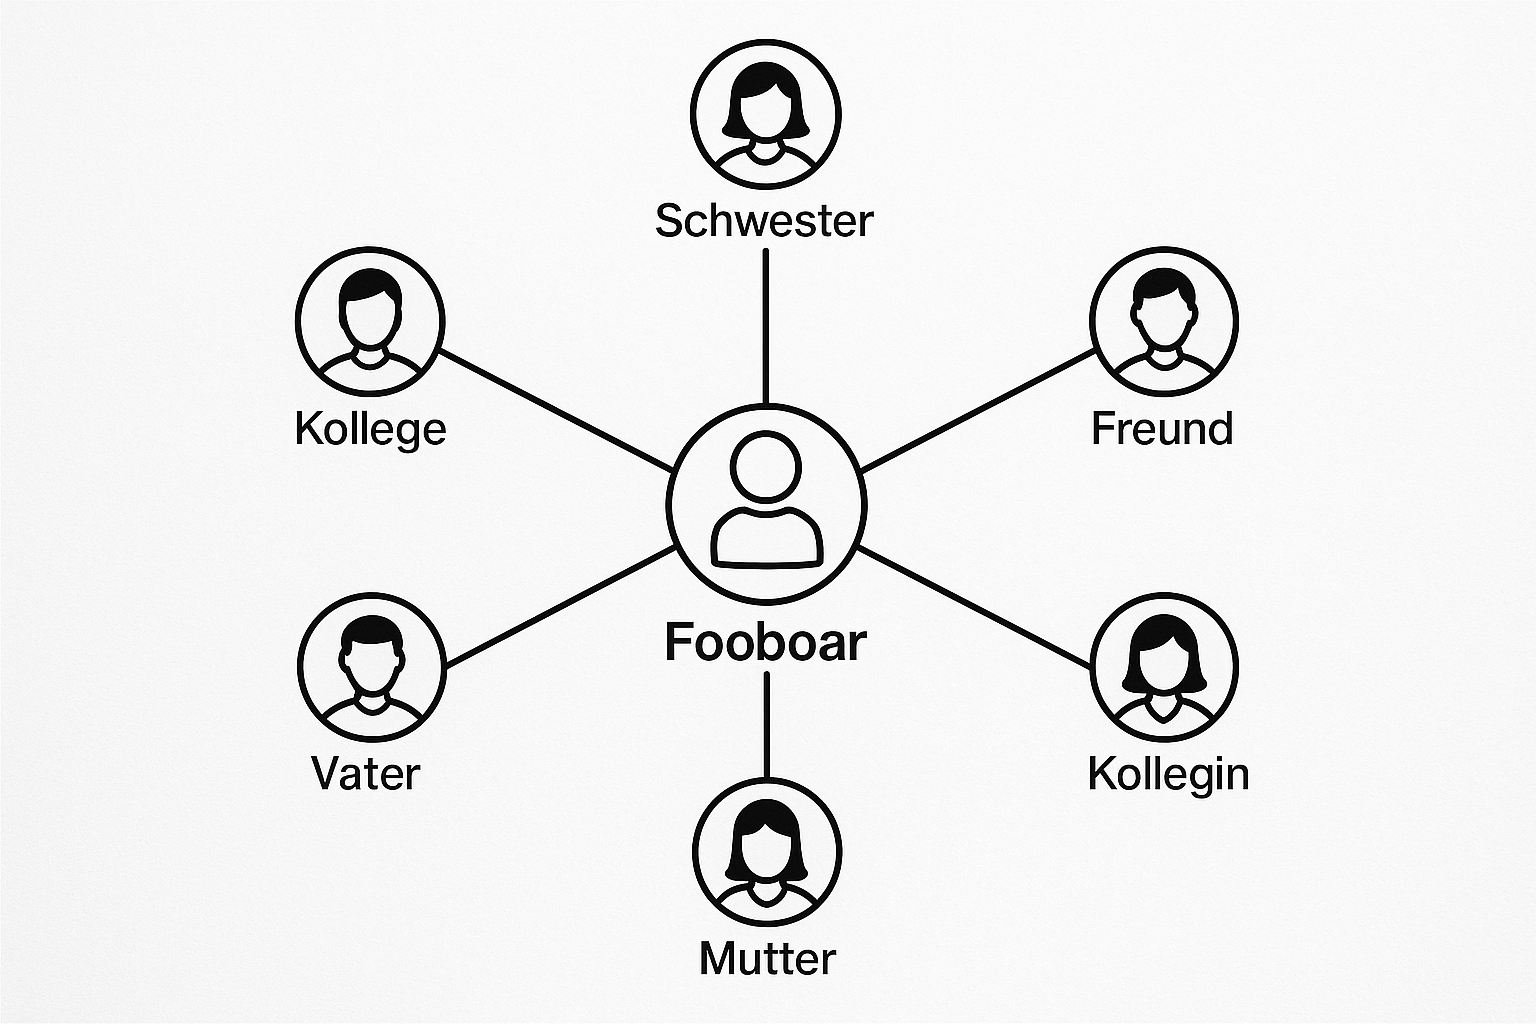

### Exkurs: Python Bibliothek "matplotlib"
Mit der Python Bobliothek matplotlib ist es möglich, Daten zu visualisieren. Das ist sehr hilfreich, wenn man Diagramme, Plots und Grafiken erstellen möchte. Ihr kennt aus dem Matheunterricht Linien-, Balken- oder Kreisdiagramme. Diese können auch mit Python mittels der matplotlib erstellt werden. Wie ihr es bereits in Aufgabe 1 mit der spaCy Bibliothek gemacht habt, müsst ihr auch hier die matplotlib downloaden.

**Aufgabe 2.1 Download von matplotlib**
Wenn man die Bibliothek zum ersten Mal verwendet, muss man sie einmalig über das Terminal downloaden. Nutze den Befehl in deinem Terminal: _pip install matplotlib_ <br>
Ab jetzt kann man sie im Code mit import matplitlib.pyplot as plt verwenden.

**Download von networkx**
Auch networkx muss zuerst über das Terminal heruntergeladen werden mit dem Befehl: _pip install networkx_ <br>
Die Python-Bibliothek networkx wird dafür genutzt Netzwerkgraphen zu erstellen. Jetzt ist der Rechner bereit für die neue Aufgabe!

### Der Input für unseren Code - Fooboar's Bekannten:
Fooboar's Schwester Clara war schon bei der ganzen Planung dabei und hat Fooboar unterstützt. Die Nachbar Linus und Nachbarin Barbara kennen Fooboar schon seit Fooboar klein war und waren bis jetzt auf jeder Geburtstagsfeier dabei. Dieses Jahr ist da natürlich keine Ausnahme, und sie sind auch wieder anwesend. Grace, seine Freundin aus dem Kindergarten, und Fooboar sind bis heute befreundet. Alan ist Foobars Sportsfreund, sie spielten immer zusammen Fußball und waren gemeinsam kegeln. Der Arbeitskollege Marvin hat Fooboar immer unterstützt, sie haben gemeinsam 4 Jahre in derselben Abteilung gearbeitet. Fernandine, seine Ex-Freundin, ist noch gut mit Clara befreundet und gemeinsam machen die drei immer noch Ausflüge.

**Aufgabe 2.2 Fehler finden**
Fooboar hat sich hier stark bemüht und einen Code erstellt, der einen Netzwerkgraphen zeigen soll. Es haben sich in den Code leider einige Fehler eingeschlichen, da Fooboar so viel mit der Planung der Party zu tun hatte. Helft Fooboar, eine Übersicht zu erstellen, damit Fooboar erklären kann, wen er kennt und woher sie sich kennen!

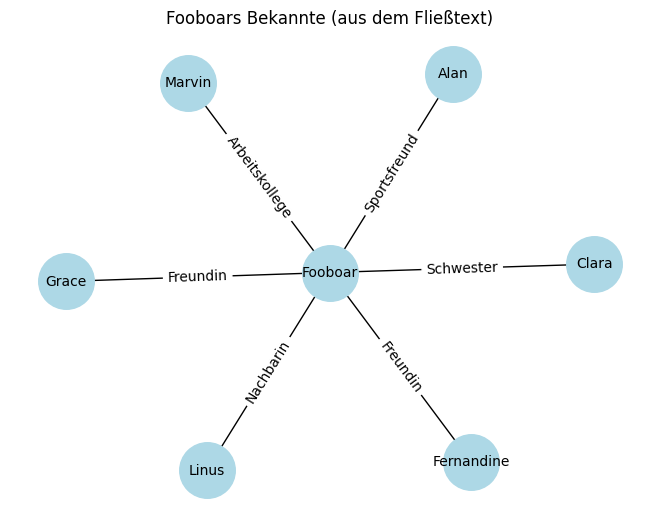

In [4]:
import re # re erkennt aus einem langen Text bestimmte Wörter oder Muster
import networkx as nx # networkx erstellt und verwaltet Netzwerkgraphen
import matplotlib.pyplot as plt

# Fließtext über Fooboars Bekannte, der wird später noch gebraucht 
text = """Fooboar's Schwester Clara war schon bei der ganzen Planung dabei und hat Fooboar unterstützt.
Die Nachbar Linus und Nachbarin Barbara kennen Fooboar schon seit Fooboar klein war und waren bis jetzt auf jeder Geburtstagsfeier dabei.
Grace, seine Freundin aus dem Kindergarten und Fooboar sind bis heute befreundet.
Alan ist Foobars Sportsfreund, sie spielten immer zusammen Fußball und waren gemeinsam Kegeln.
Der Arbeitskollege Marvin hat Fooboar immer unterstützt, sie haben gemeinsam 4 Jahre in der selben Abteilung gearbeitet.
Fernandine, seine Ex-Freundin, ist noch gut mit Clara befreundet und gemeinsam machen die drei immernoch Ausflüge.
"""

# hier haben wir ein kleines Wörterbuch mit Bezeichnungen für Fooboars Bekannte. Wird eines dieser Schlüsselwörter verwendet in dem FLießtext, kommt es auf die Kanten des Netzwerkgraphen!
REL_LABELS = {
    "Schwester": "Schwester",
    "Nachbarin": "Nachbarin",
    "Nachbar": "Nachbar",
    "Freundin": "Freundin",
    "Sportsfreund": "Sportsfreund",
    "Arbeitskollege": "Arbeitskollege",
    "Ex-Freundin": "Ex-Freundin",
}

def extract_edges_from_text(txt):
    edges = []
    sentences = re.split(r"[.!?]\s+", txt)
    for sent in sentences: # hier gehen wir jeden Satz des FLießtextes durch und...
        found_label = None
        for key, lbl in REL_LABELS.items(): # suchen eins der Wörter aus dem Wörterbuch
            if key in sent:
                found_label = lbl
                break
        if not found_label:
            continue # wenn keins der Worte vorgekommt, dann machen wir einfach mit de nächsten Satz weiter!
            # "Fooboar liebt Pizza" würde z.B. übersprungen werden, da Pizza nicht in unserem Wörterbuch aufgeführt ist.

        # finde großgeschriebene Wörter (potenzielle Namen)
        candidates = re.findall(r"\b[A-ZÄÖÜ][a-zäöü]+\b", sent) # was wir uns hier zu Nutze machen: Namen werden immer groß geschrieben :) - nach den Worten suchen wir jetzt

        # Filtere bekannte "Nicht-Namen" heraus
        stopwords = ["Der", "Die", "Das", "Er", "Sie", "Fooboar"] + list(REL_LABELS.keys())
        # Artikel und Er/Sie sind keine Namen und werden anhand einer Stoppwortliste aus der Suche direkt ausgeschlossen. Und da Fooboar in der Mitte steht, brauchen wir ihn auch nicht mehr mit in den Graphen zu nehmen.
        candidates = [c for c in candidates if c not in stopwords and not c.startswith("Foob")]

        # Wenn kein Name gefunden wird, überspringe den Satz - z.B. "Er und Fooboar machten immer gemeinsam Sport"
        if not candidates:
            continue

        # Nimm den ersten Namen als Person
        name = candidates[0]
        edges.append(("Fooboar", name, {"label": found_label})) # mit .append können wir eine neue Kante mit Label zu unserem Netzwerkgraphen hinzufügen

    return edges # hier kriegen wir die Kanten wieder

# Als letztes müssen wir jetzt noch den Graphen bauen!
def build_graph(edges):
    G = nx.Graph() # hier nutzen wir die networkx Bibliothek von Oben und erstellen den Graphen
    G.add_node("Fooboar") # in der Mitte in dem Zentralknoten Fooboar

    for u, v, data in edges: # edges ist die Liste der Kanten des Netzwerkgraphen, u ist der Startpunkt der Kante (immer Fooboar), v ist der Zielpunkt der Kante (z.B. Clara) und data steht für zusätzliche Informationen, hier das Wörterbuch
        G.add_edge(u, v, label=data["label"]) # in der Liste Edges könnten folgende Einträge stehen: [("Fooboar", "Clara", {"label": "Schwester"}), ("Fooboar", "Alan", {"label": "Sportsfreund"})]

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1600, font_size=10) # der Graph wird hier gezeichnet (Größe, Farbe etc.)
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels) # die Kanten bekommen eine Beschriftung
    plt.title("Fooboars Bekannte (aus dem Fließtext)") # die Überschirft unseres Graphen
    plt.savefig("graph.png", dpi=300, bbox_inches="tight") #Graph als png abspeichern
    # plt.tight_layout()
    plt.show() # zeigt uns den Graphen

edges = extract_edges_from_text(text) # Kanten werden in Text geändert
build_graph(edges) # Graph wird schließlich aus den Kanten gebaut!


## Aufgabe 3 - Zusagen & Absagen
Um zu wissen, **welche seiner Gäste tatsächlich zur Party kommen** schaut sich Fooboar seine Chatverläufe mit seinen Freunden an. In Chats wird zuerst der Name der entsprechenden Person und nach einem Doppelpunkt die Nachricht an Fooboar gesendet. <br> 
Um nicht jede einzelne Nachricht nochmal öffnen und lesen zu müssen, überlegt er sich, was Zusagen und Absagen gemeinsam haben: Bestimmte Wörter! Überlege, welche Wörter Menschen meistens verwenden, wenn sie zusagen oder absagen. <br>
<br>
Schreibe diese Wörter in zwei Listen auf: **positive Signale (Zusage)** und **negative Signale (Absage)**. Trage die Wörter in die beiden Mengen (englisch: sets) ein.

In [6]:
# Signalwörter, die andeuten, dass jemand kommt
positive_signale = {"ja" , "klar","komme", "dabei", "komme", "natürlich"}

# Signalwörter, die andeuten, dass jemand NICHT kommt
negative_signale = {"nicht", "leider", "kann nicht", "schaffe es nicht", "absagen"}

def finde_absender(nachricht: str):
    """
    Gibt den Absendernamen vor dem Doppelpunkt zurück.
    Zum Beispiel:
    Fooboar: Hallo! -> Fooboar
    """
    teile = nachricht.split(":", 1) # Teile den Text am ersten Doppelpunkt in zwei Teile
    if len(teile) == 2:             # Wenn wirklich ein Doppelpunkt drin ist:
        return teile[0].strip()     #   gib den ersten Teil zurück.
    return "Unbekannt"

def analysiere_antwort(nachricht: str):
    """
    Zählt positive und negative Signalwörter und entscheidet anhand der Mehrheit,
    ob eine Person wahrscheinlich kommt oder nicht.
    """
    name = finde_absender(nachricht)    # Finde den Namen im Chatverlauf.
    text = nachricht.lower()
    # Schreibe alles klein, damit Groß- und Kleinschreibung den Computer nicht verwirrt.
    
    positive_treffer = sum(1 for wort in positive_signale if wort in text)
    negative_treffer = sum(1 for wort in negative_signale if wort in text)
    # Zähle, wie viele positive und negative Wörter im Text vorkommen.
    # Ein Ergebnis könnte sein: positive_treffer == 2, negative_treffer == 1 -> Person kommt.
    
    if positive_treffer > negative_treffer:     # Wenn es mehr positive als negative Wörter gibt:
        return name, True                       # gib "True" (wahr) zurück.
    elif negative_treffer > positive_treffer:   # Sonst, wenn es mehr negative als positive gibt:
        return name, False                      # gib "False" (falsch) zurück.
    else:                                       # Sonst:
        return name, None                       # gib "None" (keine Antwort) zurück.

def sortiere_gaeste(chatverlauf):
    """
    Sortiert die vielen Chatnachrichten in drei Listen: 'kommen', 'kommen_nicht' und 'unklar'.
    """
    kommen = []         # Zusagen
    kommen_nicht = []   # Absagen
    unklar = []         # Unklare Nachrichten
    
    for nachricht in chatverlauf:
    # Wir untersuchen jede Nachricht im Chatverlauf und schauen auf die 'entscheidung',
    # die uns 'analysiere_antwort' oben geliefert hat.
        name, entscheidung = analysiere_antwort(nachricht)
        if entscheidung is True:
            kommen.append(name)
        elif entscheidung is False:
            kommen_nicht.append(name)
        else:
            unklar.append(name)
        # Von jeder Nachricht wird der Name der Absenderin zu der Liste hinzugefügt,
        # die der Entscheidung entspricht
    
    return kommen, kommen_nicht, unklar
    # Gibt die drei ausgefüllten Listen zurück.


# Fooboars Chatverlauf:
chatverlauf = [
    "Alan: Hallo Foobie, ich kann leider nicht kommen, bin im Urlaub.",
    "Barbara: Ja klar, ich freu mich schon total!",
    "Tim: Hey Fooboar, diesmal schaffe ich es nicht.",
    "Ada: Natürlich bin ich dabei!",
    "John: Hallo, muss mal schauen.",
    "Linus: Servus Foo, muss mal schauen.",
    "Grace: Komme gerne, freu mich."
]

kommen, kommen_nicht, unklar = sortiere_gaeste(chatverlauf)

# Schreibe die drei Listen in die Konsole.
print("Kommen:", kommen)
print("Kommen nicht:", kommen_nicht)
print("Unklar:", unklar)


Kommen: ['Barbara', 'Ada', 'Grace']
Kommen nicht: ['Alan', 'Tim']
Unklar: ['John', 'Linus']


## Aufgabe 4 - Geburtstagslieder

Fooboar wünscht sich zu seinem Geburtstag natürlich auch **passende Lieder**, und pragmatisch wie er ist, hat er die Dateinamen in seiner Sammlung von Liedern und Gedichten einfach durchnummeriert. Das stellt uns vor ein kleines Problem: Wie sollen wir die Geburtstagslieder finden, ohne jede Datei zu öffnen und einzeln anzuschauen?
Neben der Suche nach einzelnen Stichwörtern, die ihr schon kennengelernt habt, gibt es noch eine weitere Technik, die dabei helfen kann, große Textmengen zu analysieren: **Topic Modelling**.
Topic Modeling ist eine Methode, die dabei hilft, herauszufinden, über welche Themen in einem Dokument gesprochen wird, ohne dass man jedes Wort selbst lesen muss. 
**Wie funktioniert Topic Modeling?**
1. **Daten sammeln**: Zuerst haben wir eine große Menge an Text, wie Artikel, Bücher oder Lieder. 
2. **Wörter analysieren**: Die Software schaut sich an, welche Wörter oft zusammen vorkommen. Wenn zum Beispiel in vielen Texten die Wörter „Hund“, „Bellen“ und „Pfote“ häufig zusammen erscheinen, könnte das auf ein Thema über Hunde hindeuten. 
3. **Themen identifizieren**: Anhand der zusammenhängenden Wörter versucht die Software, verschiedene Themen zu identifizieren. Zum Beispiel könnten die Themen „Natur“, „Tiere“ oder eben „Geburtstag“ sein. 
4. **Gruppierung**: Die Software gruppiert dann die Dokumente nach diesen Themen, sodass wir sehen, welche Texte über ähnliche Dinge sprechen. Die Themen erhalten aber nicht sofort eine Überschrift: Wir müssen noch selbst erkennen, welches Thema welches ist.
**Warum ist das nützlich?** Stell dir vor, du schreibst eine große Arbeit über Tiere. Mit Topic Modeling könntest du schnell herausfinden, in welchen Texten es um einen Tiere geht, ohne jeden Text zu lesen. 

**Anwendung**
Der DARIAH Topics Explorer (https://dariah-de.github.io/TopicsExplorer/#the-application) ist eine Anwendung, die aus einer Sammlung von Textdateien (min. 5) die Topics isoliert und die Dateien so ordnet.
**1. Dateien finden** <br>
Unsere Textdateien sind bereits im Ordner Gedichte_Geburtstagslieder zusammengestellt. Sie sind im .txt-Format, das heißt, in reinen Textdateien. Wir müssen also keine weiteren Schritte unternehmen, sondern können sofort mit der Analyse starten.
Nachdem wir das Programm aufgerufen haben (DARIAH Topics Explorer.exe), was ein bisschen dauern kann, wählen wir unsere Dateien unter **1. Preprocessing** aus. 

 
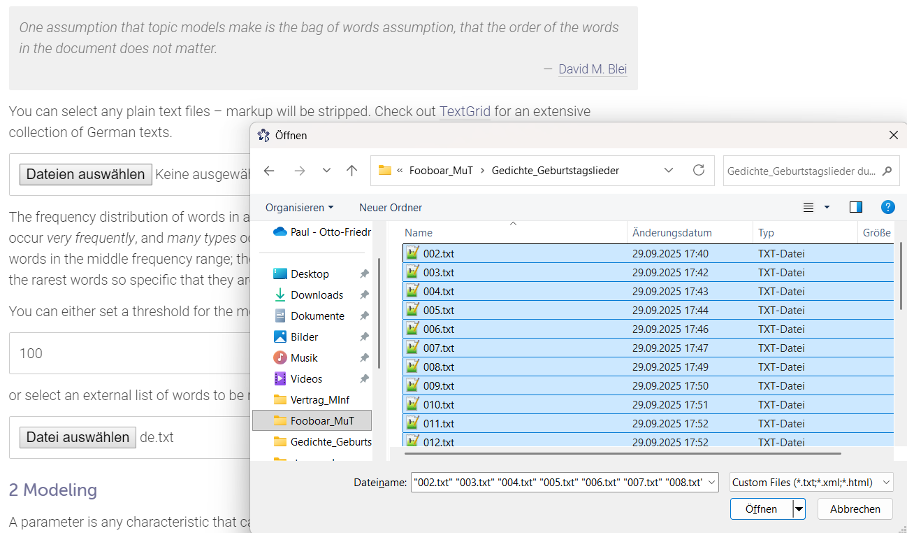

**2. Vorverarbeitung<br>**
Hier werden die Texte tokenisiert, das heißt, sie werden in einzelne Wörter geteilt, Satzzeichen werden entfernt und Groß- und Kleinschreibung angeglichen. „Das“ und „das“ werden also dasselbe Wort, „Floh“ und „floh“ aber auch. Weil in den meisten Texten einige wenige Wörter sehr häufig vorkommen (Zipfsches Gesetz), aber gleichzeitig Wörter wie _und_, _es_, _die_, vor nur sehr wenig über den Text aussagen, werden die sogenannten _Stopwords_ entfernt. Hier haben wir die Wahl, entweder die 100 (oder mehr oder weniger) häufigsten Wörter aus den Texten zu entfernen, oder eine Stopword-Liste zu verwenden. Weil eine Liste von Stopwords verhindert, dass versehentlich auch wichtige Wörter entfernt werden und weil mit DARIAH auch einige Stopwordlisten für verbreitete Sprachen mitgeliefert werden, wählen wir unten statt einer _Threshold_ unter _select an external list of words to be removed_ die Datei "\sample-corpus\stopwords\de.txt" aus. Sie enthält eine Liste der häufigsten Wörter im Deutschen.

<br>


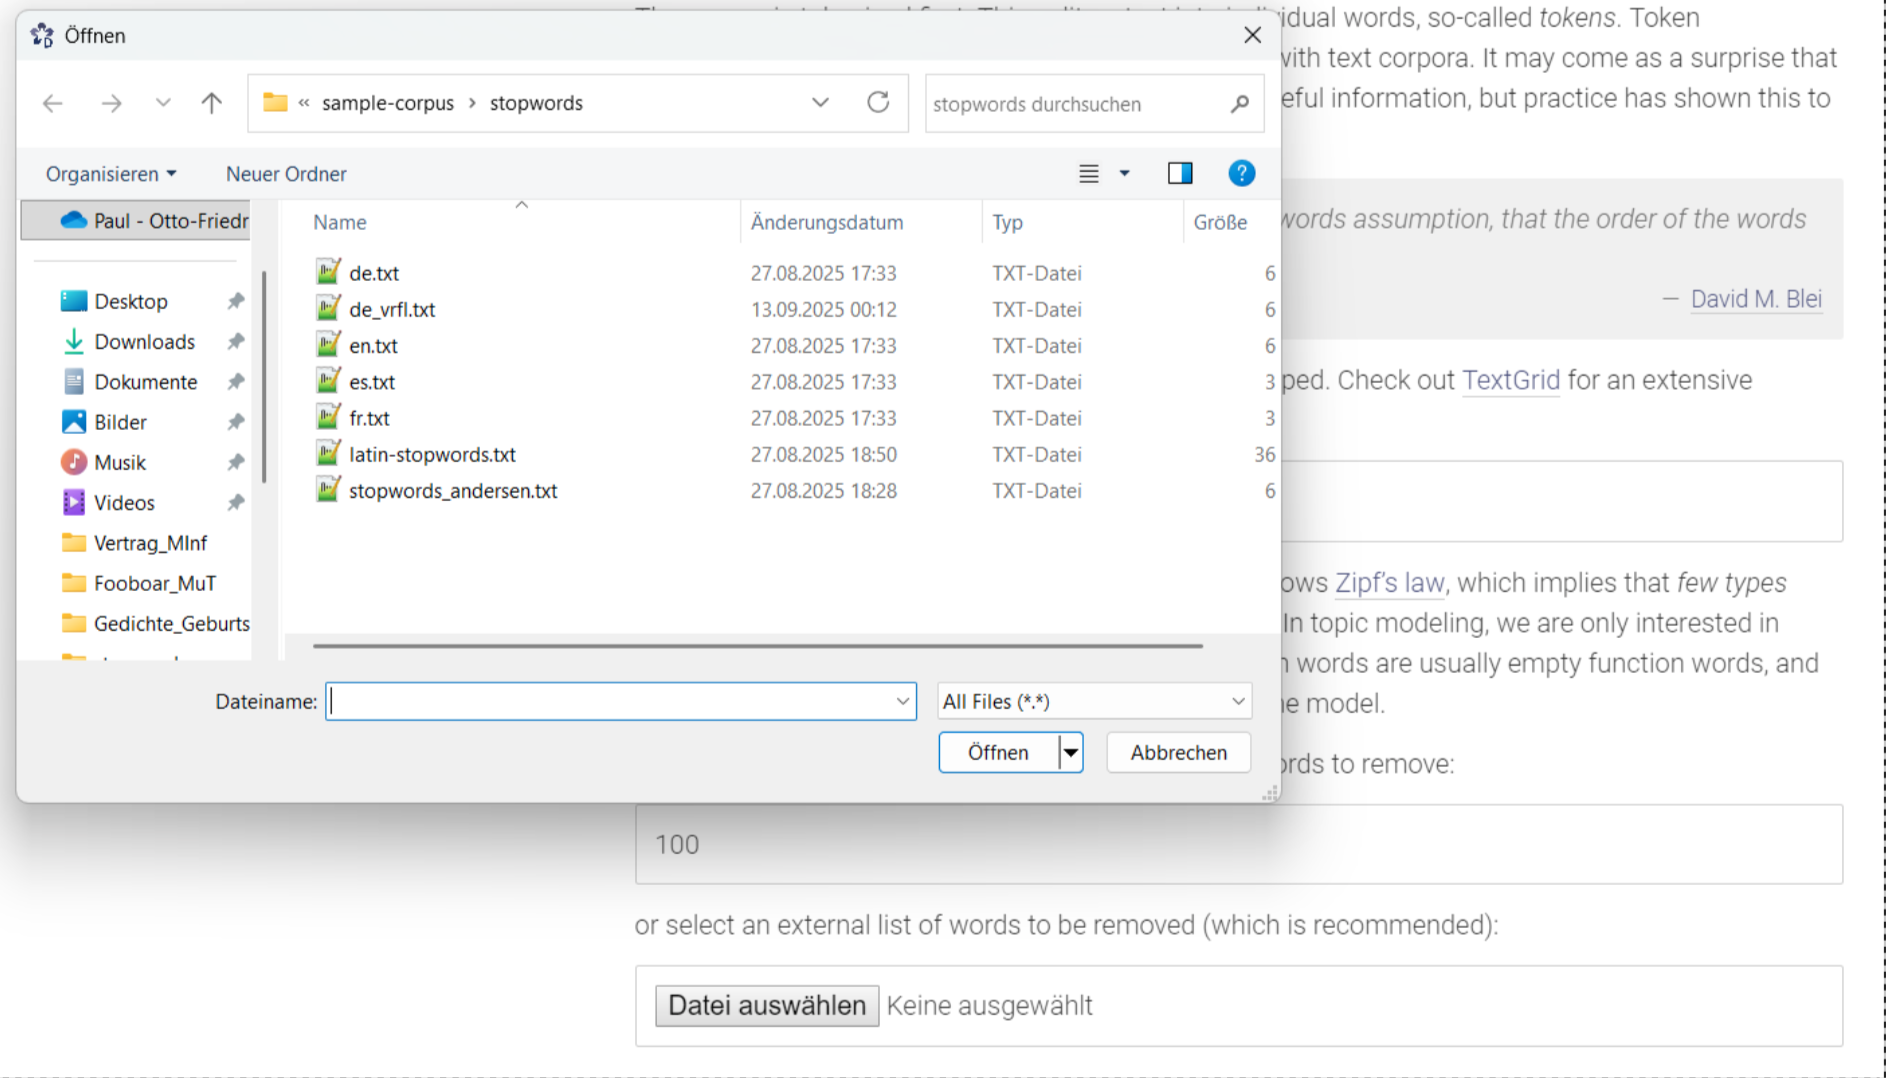

**3. Modell einstellen <br>**
Unter **2. Modeling** passen wir die Parameter an. Als Anzahl von Topics reicht für unsere überschaubare Textsammlung 6, da es nur wenige Texte sind, können wir aber auch problemlos 1000 Wiederholungen auswählen. Nun klicken wir unter **3. Visualizing** auf _Train Topic Model_.

**4. Ergebnis auswerten <br>**
Nach ca. 30 Sekunden Rechenzeit gelangen wir auf eine Übersichtsseite auf der sechs Balken mit den Wörtern, die die jeweiligen Topics am meisten prägen. In welchen Topics sind Wörter zum Thema „Geburtstag“ zu erkennen?

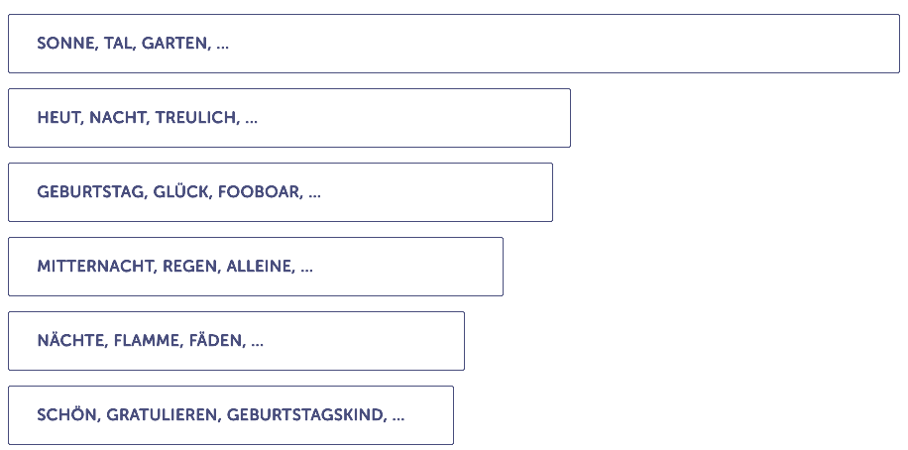

Klicke unter _Menu_ auf _Document-Topic-Distribution_: Vergleiche die blauen Kästchen, die die Übereinstimmung mit dem Topic der Spalte anzeigen, des Dokuments „Zum_Geburtstag_viel_Glück.txt“ mit denen der nummerierten Dokumente. <br>
Aufgaben: 
**Welche Dokumente sind dem bekannten Geburtstagslied am ähnlichsten? Öffne stichprobenartig einige davon. Handelt es sich um Geburtstagslieder?**


**Welche Themen könnten die anderen Lieder/Gedichte haben? Was suggerieren die Themenvorschläge?**

